# web scrapping of cityfibre reviews from trustpilot

In [1]:
#Importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

#list of URL's that will be scraped.
#first 100 pages of Trustpilot

list_of_urls =['https://uk.trustpilot.com/review/cityfibre.com',
              'https://uk.trustpilot.com/review/cityfibre.com?page=2',
              'https://uk.trustpilot.com/review/cityfibre.com?page=3',
              'https://uk.trustpilot.com/review/cityfibre.com?page=4',
              'https://uk.trustpilot.com/review/cityfibre.com?page=5',
              'https://uk.trustpilot.com/review/cityfibre.com?page=6',
              'https://uk.trustpilot.com/review/cityfibre.com?page=7',
              'https://uk.trustpilot.com/review/cityfibre.com?page=8',
              'https://uk.trustpilot.com/review/cityfibre.com?page=9',
              'https://uk.trustpilot.com/review/cityfibre.com?page=10',
              'https://uk.trustpilot.com/review/cityfibre.com?page=11',
              'https://uk.trustpilot.com/review/cityfibre.com?page=12',
              'https://uk.trustpilot.com/review/cityfibre.com?page=13',
              'https://uk.trustpilot.com/review/cityfibre.com?page=14',
              'https://uk.trustpilot.com/review/cityfibre.com?page=15',
              'https://uk.trustpilot.com/review/cityfibre.com?page=16',
              'https://uk.trustpilot.com/review/cityfibre.com?page=17',
              'https://uk.trustpilot.com/review/cityfibre.com?page=18',
              'https://uk.trustpilot.com/review/cityfibre.com?page=19',
              'https://uk.trustpilot.com/review/cityfibre.com?page=20',
              'https://uk.trustpilot.com/review/cityfibre.com?page=21',
              'https://uk.trustpilot.com/review/cityfibre.com?page=22',
              'https://uk.trustpilot.com/review/cityfibre.com?page=23',
              'https://uk.trustpilot.com/review/cityfibre.com?page=24',
              'https://uk.trustpilot.com/review/cityfibre.com?page=25',
              'https://uk.trustpilot.com/review/cityfibre.com?page=26',
              'https://uk.trustpilot.com/review/cityfibre.com?page=27',
              'https://uk.trustpilot.com/review/cityfibre.com?page=28',
              'https://uk.trustpilot.com/review/cityfibre.com?page=29',
              'https://uk.trustpilot.com/review/cityfibre.com?page=30',
              'https://uk.trustpilot.com/review/cityfibre.com?page=31',
              'https://uk.trustpilot.com/review/cityfibre.com?page=32',
              'https://uk.trustpilot.com/review/cityfibre.com?page=33',
              'https://uk.trustpilot.com/review/cityfibre.com?page=34',
              'https://uk.trustpilot.com/review/cityfibre.com?page=35',
              'https://uk.trustpilot.com/review/cityfibre.com?page=36',
              'https://uk.trustpilot.com/review/cityfibre.com?page=37',
              'https://uk.trustpilot.com/review/cityfibre.com?page=38',
              'https://uk.trustpilot.com/review/cityfibre.com?page=39',
              'https://uk.trustpilot.com/review/cityfibre.com?page=40',
              'https://uk.trustpilot.com/review/cityfibre.com?page=41',
              'https://uk.trustpilot.com/review/cityfibre.com?page=42',
              'https://uk.trustpilot.com/review/cityfibre.com?page=43',
              'https://uk.trustpilot.com/review/cityfibre.com?page=44',
              'https://uk.trustpilot.com/review/cityfibre.com?page=45',
              'https://uk.trustpilot.com/review/cityfibre.com?page=46',
              'https://uk.trustpilot.com/review/cityfibre.com?page=47',
              'https://uk.trustpilot.com/review/cityfibre.com?page=48',
              'https://uk.trustpilot.com/review/cityfibre.com?page=49',
              'https://uk.trustpilot.com/review/cityfibre.com?page=50',
              'https://uk.trustpilot.com/review/cityfibre.com?page=51',
              'https://uk.trustpilot.com/review/cityfibre.com?page=52',
              'https://uk.trustpilot.com/review/cityfibre.com?page=53',
              'https://uk.trustpilot.com/review/cityfibre.com?page=54',
              'https://uk.trustpilot.com/review/cityfibre.com?page=55',
              'https://uk.trustpilot.com/review/cityfibre.com?page=56',
              'https://uk.trustpilot.com/review/cityfibre.com?page=57',
              'https://uk.trustpilot.com/review/cityfibre.com?page=58',
              'https://uk.trustpilot.com/review/cityfibre.com?page=59',
              'https://uk.trustpilot.com/review/cityfibre.com?page=60',
              'https://uk.trustpilot.com/review/cityfibre.com?page=61',
              'https://uk.trustpilot.com/review/cityfibre.com?page=62',
              'https://uk.trustpilot.com/review/cityfibre.com?page=63',
              'https://uk.trustpilot.com/review/cityfibre.com?page=64',
              'https://uk.trustpilot.com/review/cityfibre.com?page=65',
              'https://uk.trustpilot.com/review/cityfibre.com?page=66',
              'https://uk.trustpilot.com/review/cityfibre.com?page=67',
              'https://uk.trustpilot.com/review/cityfibre.com?page=68',
              'https://uk.trustpilot.com/review/cityfibre.com?page=69',
              'https://uk.trustpilot.com/review/cityfibre.com?page=70',
              'https://uk.trustpilot.com/review/cityfibre.com?page=71',
              'https://uk.trustpilot.com/review/cityfibre.com?page=72',
              'https://uk.trustpilot.com/review/cityfibre.com?page=73',
              'https://uk.trustpilot.com/review/cityfibre.com?page=74',
              'https://uk.trustpilot.com/review/cityfibre.com?page=75',
              'https://uk.trustpilot.com/review/cityfibre.com?page=76',
              'https://uk.trustpilot.com/review/cityfibre.com?page=77',
              'https://uk.trustpilot.com/review/cityfibre.com?page=78',
              'https://uk.trustpilot.com/review/cityfibre.com?page=79',
              'https://uk.trustpilot.com/review/cityfibre.com?page=80',
              'https://uk.trustpilot.com/review/cityfibre.com?page=81',
              'https://uk.trustpilot.com/review/cityfibre.com?page=82',
              'https://uk.trustpilot.com/review/cityfibre.com?page=83',
              'https://uk.trustpilot.com/review/cityfibre.com?page=84',
              'https://uk.trustpilot.com/review/cityfibre.com?page=85',
              'https://uk.trustpilot.com/review/cityfibre.com?page=86',
              'https://uk.trustpilot.com/review/cityfibre.com?page=87',
              'https://uk.trustpilot.com/review/cityfibre.com?page=88',
              'https://uk.trustpilot.com/review/cityfibre.com?page=89',
              'https://uk.trustpilot.com/review/cityfibre.com?page=90',
              'https://uk.trustpilot.com/review/cityfibre.com?page=91',
              'https://uk.trustpilot.com/review/cityfibre.com?page=92',
              'https://uk.trustpilot.com/review/cityfibre.com?page=93',
              'https://uk.trustpilot.com/review/cityfibre.com?page=94',
              'https://uk.trustpilot.com/review/cityfibre.com?page=95',
              'https://uk.trustpilot.com/review/cityfibre.com?page=96',
              'https://uk.trustpilot.com/review/cityfibre.com?page=97',
              'https://uk.trustpilot.com/review/cityfibre.com?page=98',
              'https://uk.trustpilot.com/review/cityfibre.com?page=99',
              'https://uk.trustpilot.com/review/cityfibre.com?page=100']


#creating list 
names =[]
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "#############", 'url': url} #using the ScraperAPI proxy manager to block off anti-bot
    response = requests.get('http://api.scraperapi.com/',   
params=urlencode(params)) #send a get request for the specific URL’s HTML to the web server.
    
    soup_object = BeautifulSoup(response.text, 'html.parser') #convert the data into a BeautifulSoup object
    
#For each of the data elements we want to extract, find all the HTML lines that are within a specific tag and class.
#extract the data elements and store the data in a list. For this project, am extracting reviewer names and review text.

    for item in soup_object.find_all("span", {"class": "typography_heading-xxs__QKBS8 typography_appearance-default__AAY17"}):                 #name element
        data_string = data_string + item.get_text()
        names.append(data_string)
        data_string = ""
    
    for item in soup_object.find_all("p", {"class": "typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):       #reviews element
        data_string = data_string + item.get_text()
        reviews.append(data_string)
        data_string = ""
    
# Create the dictionary.
reviews_dict = {'Names': names, 'Reviews': reviews}

# Print the lengths of each list.  
print(len(names), len(reviews))

1840 1656


In [2]:
#Create the Data Frame
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839
Names,Anne,sheila lavery,Alan Scantlebury,Toni Hamilton,Leesa Clarke,Stejacjam,Ed Moss,Samra,Carl Hunt,Mark Purnell,...,MARTIN AINSWORTH,Mr. Simon Clifton,Keith Schier,Scott C,Adam Stokes,Peter Nwora,Alistair McHaffie,Jaswinder,Jevgenijs,Customer
Reviews,Full fibre worked for 4 days then I had no int...,Had city fibre fitted via a free upgrade with...,Had to contact Cityfibre as there's no easy wa...,Other than a little mess left behind by brick ...,City fibre came to install our full fibre broa...,Very poor. Installation looks lazy and below e...,"Absolutely terrific experience. Bang on time,...",Tyler and Aladin were exceptional. I was advis...,Really impressed with these guys. Spoke about...,The 10th engineer visiting completed the insta...,...,None,None,None,None,None,None,None,None,None,None


In [3]:
#create function to transpose dataframe
def switch_col (df):
    col_switch=df.T
    return col_switch

# Transpose the dataframe to switch the column;row orientation.


In [4]:
#print transposed column
cityfibre_reviews= switch_col (df)
print(cityfibre_reviews)

                  Names                                            Reviews
0                  Anne  Full fibre worked for 4 days then I had no int...
1         sheila lavery  Had city fibre fitted via a free upgrade  with...
2      Alan Scantlebury  Had to contact Cityfibre as there's no easy wa...
3         Toni Hamilton  Other than a little mess left behind by brick ...
4          Leesa Clarke  City fibre came to install our full fibre broa...
...                 ...                                                ...
1835        Peter Nwora                                               None
1836  Alistair McHaffie                                               None
1837          Jaswinder                                               None
1838          Jevgenijs                                               None
1839           Customer                                               None

[1840 rows x 2 columns]


In [5]:
def get_missing_sum(cityfibre_reviews):
    missing=cityfibre_reviews.isnull().sum().sum()
    return missing

In [6]:
#print missing value sum

sum_null = get_missing_sum(cityfibre_reviews)
print(sum_null)

184


In [7]:
#create function to check missing value per columns
def get_missing_col(cityfibre_reviews):
    col_missing=cityfibre_reviews.isnull().sum()
    return col_missing

In [8]:
#print missing values per column
col_null=get_missing_col(cityfibre_reviews)
print(col_null)

Names        0
Reviews    184
dtype: int64


In [9]:
#create function to drop missing value col

def drop_na (cityfibre_reviews):
    dropped=cityfibre_reviews.dropna()
    return dropped

In [10]:
#print df
cityfibre_reviews= drop_na (cityfibre_reviews)
cityfibre_reviews=cityfibre_reviews.reset_index(drop=True)
cityfibre_reviews

,Names,Reviews
0,Anne,Full fibre worked for 4 days then I had no int...
1,sheila lavery,Had city fibre fitted via a free upgrade with...
2,Alan Scantlebury,Had to contact Cityfibre as there's no easy wa...
3,Toni Hamilton,Other than a little mess left behind by brick ...
4,Leesa Clarke,City fibre came to install our full fibre broa...
...,...,...
1651,Altafussen Ganimia,The engineers turned up on time and successful...
1652,Lauren,The engineers couldn’t nearly attach a power e...
1653,Story Turtle,The installation process was great and the eng...
1654,Mr and Mrs Lambert,Hi. I Did switch from virgin media to city fib...


In [11]:
#create a function to get an overview of the dataframe

def get_overview (cityfibre_reviews):
    abt= cityfibre_reviews.info()
    return abt

In [12]:
#print overview
overview = get_overview (cityfibre_reviews)
print(overview)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Names    1656 non-null   object
 1   Reviews  1656 non-null   object
dtypes: object(2)
memory usage: 26.0+ KB
None


In [13]:
#create a function to evalute the statistical summary of the dataframe
def get_stats_summary (cityfibre_reviews):
    stats=cityfibre_reviews.describe()
    return stats

In [14]:
#print stats
statistical_summary = get_stats_summary (cityfibre_reviews)
print(statistical_summary)

           Names                                            Reviews
count       1656                                               1656
unique      1552                                               1655
top     customer  Complained to CityFibre about my terrible (luc...
freq          17                                                  2


In [15]:
#create a fucntion to get the dataframe shape

def get_shape (cityfibre_reviews):
    shape= cityfibre_reviews.shape
    return shape

In [16]:
#print shape

data_shape= get_shape (cityfibre_reviews)
print(data_shape)

(1656, 2)


In [17]:
#create function to check for duplicate
def get_duplicate (cityfibre_reviews):
    duplicates=cityfibre_reviews.duplicated().sum().sum()
    return duplicates

In [18]:
#print duplicates
duplicate_sum= get_duplicate (cityfibre_reviews)
print(duplicate_sum)

0


In [19]:
#create function to check unique values
def check_unique (Reviews):
    unique= cityfibre_reviews.Reviews.unique()
    return unique

In [20]:
#print unique 
unique_reviews= check_unique ('Reviews')
print(unique_reviews)

["Full fibre worked for 4 days then I had no internet for the weekend as team couldn't fix on Saturday and then unavailable until Monday. Workers did not use footwear protection whilst walking in and out of my house on cream carpet. Left dust and bits from their drilling. When the service did work there was no known difference in my service. Kind of wish I hadn't bothered."
 "Had city fibre fitted via a free upgrade  with Talk Talk Internet hasn't worked since. Had Talk Talk engineer  revert back to copper connection. Engineer  suspected line, which can only be fixed by city fibre."
 "Had to contact Cityfibre as there's no easy way to unsubscribe from getting emails with regards to signing up my interest for a particular address, as I have since moved and I keep getting hounded by their emails with regards to not signing up for broadband at my previous address. I filled in the form that they linked me to but I am still getting emails. If this isn't sorted, I'll be filing a complaint of

# Text Preprocessing

In [21]:
# create function Removing three consecutive commas (,,,). from Names column
def remove_commas (Reviews):
    no_commas = cityfibre_reviews.Reviews.apply(lambda x: x.split(',,,')[0])
    return no_commas
#cityfibre_reviews['Names']=cityfibre_reviews['Names'].apply(lambda x: x.split(',,,')[0])

In [22]:
#print dataframe
cityfibre_reviews['Reviews'] = remove_commas ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Full fibre worked for 4 days then I had no int...
1       Had city fibre fitted via a free upgrade  with...
2       Had to contact Cityfibre as there's no easy wa...
3       Other than a little mess left behind by brick ...
4       City fibre came to install our full fibre broa...
                              ...                        
1651    The engineers turned up on time and successful...
1652    The engineers couldn’t nearly attach a power e...
1653    The installation process was great and the eng...
1654    Hi. I Did switch from virgin media to city fib...
1655    The engineers arrived late. They left the wall...
Name: Reviews, Length: 1656, dtype: object

In [23]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Great overall experience, engineer came on time, installed everything, make sure it was working properly,  tidied up afterwards. Was very polite and professional.
Review 2:
 The only thing I would like to know is why it was installed in a bedroom upstairs and not near a plug socket it now means I have to have a extension lead plug in all the time
Review 3:
 Engineers Arrived in the allotted time, we’re very professional and polite. Explained everything they were doing in detail. Also, our broadband is now super fast. Impressed.
Review 4:
 Finally what took 3 months of various different Kelly’s communication teams coming out to install and fix issues Dimitri and Vlad fixed all the issues (basically had to do a total new install due to bad practice of original install) in under and hour. Thank you thank you thank you making what has been what seemed like a never ending problem to a finally painless fix. You should send that dream team for all problems.
Review 5:
 I received an

In [24]:
#Create function to remove exclamation!!! from reviews
def remove_exlamation (Reviews):
    no_exclamaton = cityfibre_reviews.Reviews.apply(lambda x: x.split('!!!')[0])
    return no_exclamaton

In [25]:
#print dataframe
cityfibre_reviews['Reviews'] = remove_exlamation ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Full fibre worked for 4 days then I had no int...
1       Had city fibre fitted via a free upgrade  with...
2       Had to contact Cityfibre as there's no easy wa...
3       Other than a little mess left behind by brick ...
4       City fibre came to install our full fibre broa...
                              ...                        
1651    The engineers turned up on time and successful...
1652    The engineers couldn’t nearly attach a power e...
1653    The installation process was great and the eng...
1654    Hi. I Did switch from virgin media to city fib...
1655    The engineers arrived late. They left the wall...
Name: Reviews, Length: 1656, dtype: object

In [26]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Great overall experience, engineer came on time, installed everything, make sure it was working properly,  tidied up afterwards. Was very polite and professional.
Review 2:
 The only thing I would like to know is why it was installed in a bedroom upstairs and not near a plug socket it now means I have to have a extension lead plug in all the time
Review 3:
 Engineers Arrived in the allotted time, we’re very professional and polite. Explained everything they were doing in detail. Also, our broadband is now super fast. Impressed.
Review 4:
 Finally what took 3 months of various different Kelly’s communication teams coming out to install and fix issues Dimitri and Vlad fixed all the issues (basically had to do a total new install due to bad practice of original install) in under and hour. Thank you thank you thank you making what has been what seemed like a never ending problem to a finally painless fix. You should send that dream team for all problems.
Review 5:
 I received an

In [27]:
#create function to remove punctuation from reviews
import re
import string
def remove_punct (Reviews):
    no_punct = cityfibre_reviews.Reviews.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
    return no_punct

In [28]:
cityfibre_reviews['Reviews'] = remove_punct ('Reviews')
#print(cityfibre_reviews)
cityfibre_reviews['Reviews']

0       Full fibre worked for 4 days then I had no int...
1       Had city fibre fitted via a free upgrade  with...
2       Had to contact Cityfibre as theres no easy way...
3       Other than a little mess left behind by brick ...
4       City fibre came to install our full fibre broa...
                              ...                        
1651    The engineers turned up on time and successful...
1652    The engineers couldn’t nearly attach a power e...
1653    The installation process was great and the eng...
1654    Hi I Did switch from virgin media to city fibe...
1655    The engineers arrived late They left the walls...
Name: Reviews, Length: 1656, dtype: object

In [29]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Great overall experience engineer came on time installed everything make sure it was working properly  tidied up afterwards Was very polite and professional
Review 2:
 The only thing I would like to know is why it was installed in a bedroom upstairs and not near a plug socket it now means I have to have a extension lead plug in all the time
Review 3:
 Engineers Arrived in the allotted time we’re very professional and polite Explained everything they were doing in detail Also our broadband is now super fast Impressed
Review 4:
 Finally what took 3 months of various different Kelly’s communication teams coming out to install and fix issues Dimitri and Vlad fixed all the issues basically had to do a total new install due to bad practice of original install in under and hour Thank you thank you thank you making what has been what seemed like a never ending problem to a finally painless fix You should send that dream team for all problems
Review 5:
 I received an installation ser

In [30]:
#Expand Contractions

#Expand Contractions
#Contractions are the shortened versions of words like don’t for do not and how’ll for how will.
#These are used to reduce the speaking and writing time of words.
#expand these contractions for a better analysis of the reviews
#I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms

import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % 
'|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the Reviews column
cityfibre_reviews['Reviews']=cityfibre_reviews['Reviews'].apply(lambda x:expand_contractions(x))

# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Great overall experience engineer came on time installed everything make sure it was working properly  tidied up afterwards Was very polite and professional
Review 2:
 The only thing I would like to know is why it was installed in a bedroom upstairs and not near a plug socket it now means I have to have a extension lead plug in all the time
Review 3:
 Engineers Arrived in the allotted time we’re very professional and polite Explained everything they were doing in detail Also our broadband is now super fast Impressed
Review 4:
 Finally what took 3 months of various different Kelly’s communication teams coming out to install and fix issues Dimitri and Vlad fixed all the issues basically had to do a total new install due to bad practice of original install in under and hour Thank you thank you thank you making what has been what seemed like a never ending problem to a finally painless fix You should send that dream team for all problems
Review 5:
 I received an installation ser

In [31]:
#Lowercase the reviews

#Lowercase the reviews
#In NLP, models treat words like Boy and boy differently, even if they are the same.
#Therefore, to overcome this problem, lowercase the text
#using the lower() function available in Python for converting text to lowercase:

#create a function to lowercase the reviews
def lower_case_text (Reviews):
    lowered = cityfibre_reviews.Reviews.apply(lambda x: x.lower())
    return lowered

In [32]:
# Reviewing some reviews to check for errors
for index,text in enumerate(cityfibre_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Great overall experience engineer came on time installed everything make sure it was working properly  tidied up afterwards Was very polite and professional
Review 2:
 The only thing I would like to know is why it was installed in a bedroom upstairs and not near a plug socket it now means I have to have a extension lead plug in all the time
Review 3:
 Engineers Arrived in the allotted time we’re very professional and polite Explained everything they were doing in detail Also our broadband is now super fast Impressed
Review 4:
 Finally what took 3 months of various different Kelly’s communication teams coming out to install and fix issues Dimitri and Vlad fixed all the issues basically had to do a total new install due to bad practice of original install in under and hour Thank you thank you thank you making what has been what seemed like a never ending problem to a finally painless fix You should send that dream team for all problems
Review 5:
 I received an installation ser

In [33]:
#parse preprocessed text into csv file
cityfibre_reviews['Reviews'].to_csv('preprocessed_cityfibre_reviews.csv', index=False, header=True)

In [34]:
#Removing Stopwords with NLTK library
#Stopwords are the most commonly occurring words in a text which do not provide any valuable information. 
#stopwords like they, there, this, where, etc are some of the stopwords

# Importing spacy

import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
cityfibre_reviews['Reviews']=cityfibre_reviews['Reviews'].apply(lambda x: ' '.join([token.lemma_ 
                                                                                    for token in list(nlp(x)) if 
                                                                                    (token.is_stop==False)]))

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


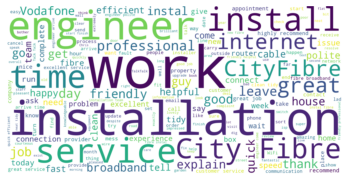

In [35]:
# Visualization
#Generating wordcloud plot

#create some wordclouds to see the most frequently used words in the reviews
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('newWord')
text = " ".join(review for review in cityfibre_reviews.Reviews)

wordcloud = WordCloud(stopwords=stopwords).generate(text)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

In [36]:
#Define a function which can be applied to calculate the sentiment score for the whole dataset

from textblob import TextBlob

def senti_ment (x):
    return TextBlob(x).sentiment  
cityfibre_reviews['sentiment_score'] = cityfibre_reviews['Reviews'].apply(senti_ment)
 
cityfibre_reviews.sentiment_score


0                                       (0.6, 0.9)
1                        (0.4, 0.6000000000000001)
2       (-0.07333333333333333, 0.5066666666666667)
3       (0.02798295454545455, 0.44431818181818183)
4                      (0.26833333333333337, 0.79)
                           ...                    
1651                                (0.382, 0.638)
1652                                    (0.1, 0.4)
1653                                 (0.45, 0.425)
1654     (0.27499999999999997, 0.6083333333333333)
1655                                   (-0.3, 0.6)
Name: sentiment_score, Length: 1656, dtype: object

In [37]:
#check the polarity of a review using the TextBlob library in Python

from textblob import TextBlob
cityfibre_reviews['polarity']=cityfibre_reviews['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)
cityfibre_reviews['polarity']

0       0.600000
1       0.400000
2      -0.073333
3       0.027983
4       0.268333
          ...   
1651    0.382000
1652    0.100000
1653    0.450000
1654    0.275000
1655   -0.300000
Name: polarity, Length: 1656, dtype: float64

In [38]:
#take a look at some of the most positive reviews from the customers

print(" 5 Random Reviews with Highest Polarity:")
for index,review in enumerate(cityfibre_reviews.iloc[cityfibre_reviews['polarity'].sort_values
                                                     (ascending=False)[:5].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

 5 Random Reviews with Highest Polarity:
Review 1:
 excellent quality
Review 2:
 excellent service thank appreciate
Review 3:
 excellent work engineer
Review 4:
 excellent service team job 👍
Review 5:
 Micky Carl 17 Rotterdam road excellent job helpful explain job


In [39]:
#sample of negative reviews from the customers
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(cityfibre_reviews.iloc[cityfibre_reviews['polarity'].sort_values
                                                     (ascending=True)[:5].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 join city fibre talktalk pensioner   engineer come today say cable staple entrance   Husband suggest go passageway say explanation leave   pensioner lot stress spend 2 hrs 4 week extension exist contract know terrible service broadband company   point have fibre engineer survey try resolve issue   end go exist supplier   customer warn city fibre promise lot deliver
Review 2:
 contractor block drain dig road pay terrible customer service touch broadband barge pole
Review 3:
 mum 3 miss engineer appointment install broadband inform go attend ridiculous guy communicate mum lose holiday time job threaten broadband guy truly awful 😣
Review 4:
 fed day ur sale man knock door try sell call cold calling
Review 5:
 work system engineer give wrong bad advice unhappy disappoint City Fibre


# Topic Modelling
 #Topic Modelling; implementation of Latent Dirichlet Allocation (LDA)
#Topic Modelling are a type of statistical language models used for uncovering hidden structure in a collection of texts 
#LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, 
#and each document is a mixture of over a set of topic probabilities

In [40]:
#Prepare data for LDA Analysis
#transform the textual data in a format that will serve as an input for training LDA model. 
#tokenizing the text and removing stopwords. 
#convert the tokenized object into a corpus and dictionary

#inporting libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = cityfibre_reviews.Reviews.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fibre', 'work', 'day', 'internet', 'weekend', 'team', 'fix', 'saturday', 'unavailable', 'monday', 'workers', 'footwear', 'protection', 'whilst', 'walk', 'house', 'cream', 'carpet', 'leave', 'dust', 'bit', 'drilling', 'service', 'work', 'know', 'difference', 'service', 'kind', 'wish', 'bother']


# LDA model training

In [41]:
import gensim.corpora as corpora
# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1)]


In [42]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"job" + 0.029*"engineer" + 0.028*"great" + 0.028*"service" + '
  '0.028*"work" + 0.027*"installation" + 0.025*"professional" + 0.024*"polite" '
  '+ 0.021*"helpful" + 0.021*"explain"'),
 (1,
  '0.066*"guy" + 0.064*"friendly" + 0.059*"get" + 0.025*"run" + 0.022*"give" + '
  '0.022*"start" + 0.021*"cityfibre" + 0.015*"easy" + 0.013*"finish" + '
  '0.013*"mbps"'),
 (2,
  '0.047*"fibre" + 0.032*"city" + 0.022*"vodafone" + 0.022*"installation" + '
  '0.020*"internet" + 0.017*"talk" + 0.015*"speed" + 0.014*"engineer" + '
  '0.014*"service" + 0.013*"turn"'),
 (3,
  '0.039*"cable" + 0.020*"switch" + 0.018*"call" + 0.018*"box" + '
  '0.016*"router" + 0.015*"provider" + 0.014*"week" + 0.011*"communication" + '
  '0.011*"happen" + 0.010*"connect"')]


# Dominant topic and its percentage contribution in each document

In [43]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts = data_words):
    # Init output
    sent_topics_cityfibre_reviews = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_cityfibre_reviews = sent_topics_cityfibre_reviews.append(pd.Series([int(topic_num), 
                                                                                                round(prop_topic,4), 
                                                                                                topic_keywords]), 
                                                                                     ignore_index=True)
            else:
                break
    sent_topics_cityfibre_reviews.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_cityfibre_reviews = pd.concat([sent_topics_cityfibre_reviews, contents], axis=1)
    return(sent_topics_cityfibre_reviews)


cityfibre_reviews_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts = data_words)

# Format
cityfibre_reviews_dominant_topic = cityfibre_reviews_topic_sents_keywords.reset_index()
cityfibre_reviews_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
cityfibre_reviews_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3992,"cable, switch, call, box, router, provider, we...","[fibre, work, day, internet, weekend, team, fi..."
1,1,2.0,0.8558,"fibre, city, vodafone, installation, internet,...","[city, fibre, fit, free, upgrade, talk, talk, ..."
2,2,2.0,0.3865,"fibre, city, vodafone, installation, internet,...","[contact, cityfibre, easy, way, unsubscribe, g..."
3,3,2.0,0.4774,"fibre, city, vodafone, installation, internet,...","[little, mess, leave, brick, dust, complain, c..."
4,4,0.0,0.5098,"job, engineer, great, service, work, installat...","[city, fibre, come, install, fibre, broadband,..."
5,5,2.0,0.5582,"fibre, city, vodafone, installation, internet,...","[poor, installation, look, lazy, expect, exper..."
6,6,2.0,0.7287,"fibre, city, vodafone, installation, internet,...","[absolutely, terrific, experience, bang, time,..."
7,7,0.0,0.7965,"job, engineer, great, service, work, installat...","[tyler, aladin, exceptional, advise, arrive, t..."
8,8,1.0,0.5733,"guy, friendly, get, run, give, start, cityfibr...","[impressed, guy, speak, slightly, tricky, floo..."
9,9,2.0,0.8635,"fibre, city, vodafone, installation, internet,...","[th, engineer, visit, complete, installation, ..."


# The most representative sentence for each topic

In [44]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sortedcityfibre_reviews_mallet = pd.DataFrame()
sent_topics_outcityfibre_reviews_grpd = cityfibre_reviews_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outcityfibre_reviews_grpd:
    sent_topics_sortedcityfibre_reviews_mallet = pd.concat([sent_topics_sortedcityfibre_reviews_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sortedcityfibre_reviews_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sortedcityfibre_reviews_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sortedcityfibre_reviews_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9572,"job, engineer, great, service, work, installation, professional, polite, helpful, explain","[informative, charismatic, duo, engineer, cool, job, attentive, detail, good, listener, enjoy, j..."
1,1.0,0.7796,"guy, friendly, get, run, give, start, cityfibre, easy, finish, mbps","[fast, interaction, friendly, brandon, woodburn, charlie, cowe]"
2,2.0,0.9651,"fibre, city, vodafone, installation, internet, talk, speed, engineer, service, turn","[wait, city, fibre, complete, work, connection, th, october, twice, certain, bit, work, tell, vo..."
3,3.0,0.8228,"cable, switch, call, box, router, provider, week, communication, happen, connect","[close, eye, engineer, common, sence, leed, lazy, try, cut, corner, rectify, work]"


# Frequency Distribution of Word Counts in Documents

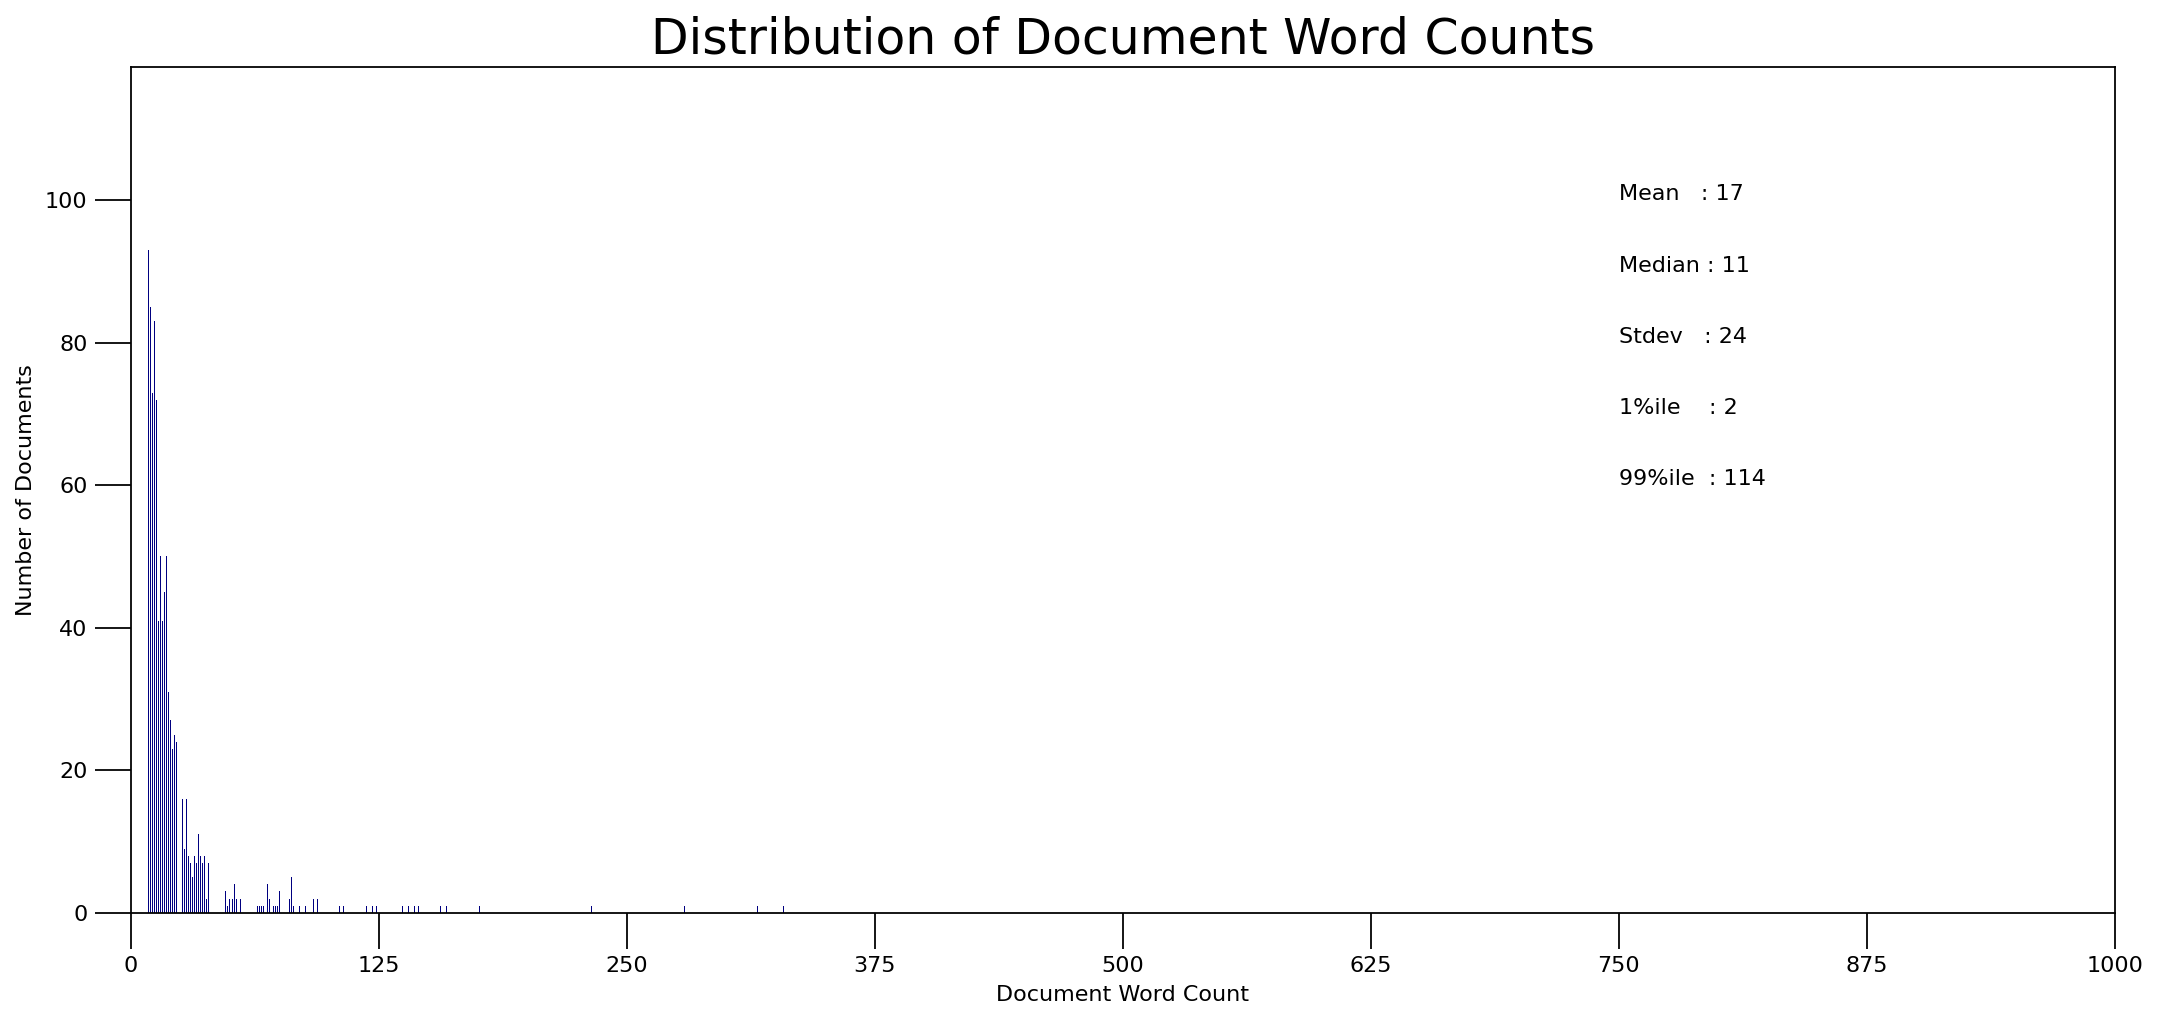

In [45]:
# document word counts distribution plot

doc_lens = [len(d) for d in cityfibre_reviews_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

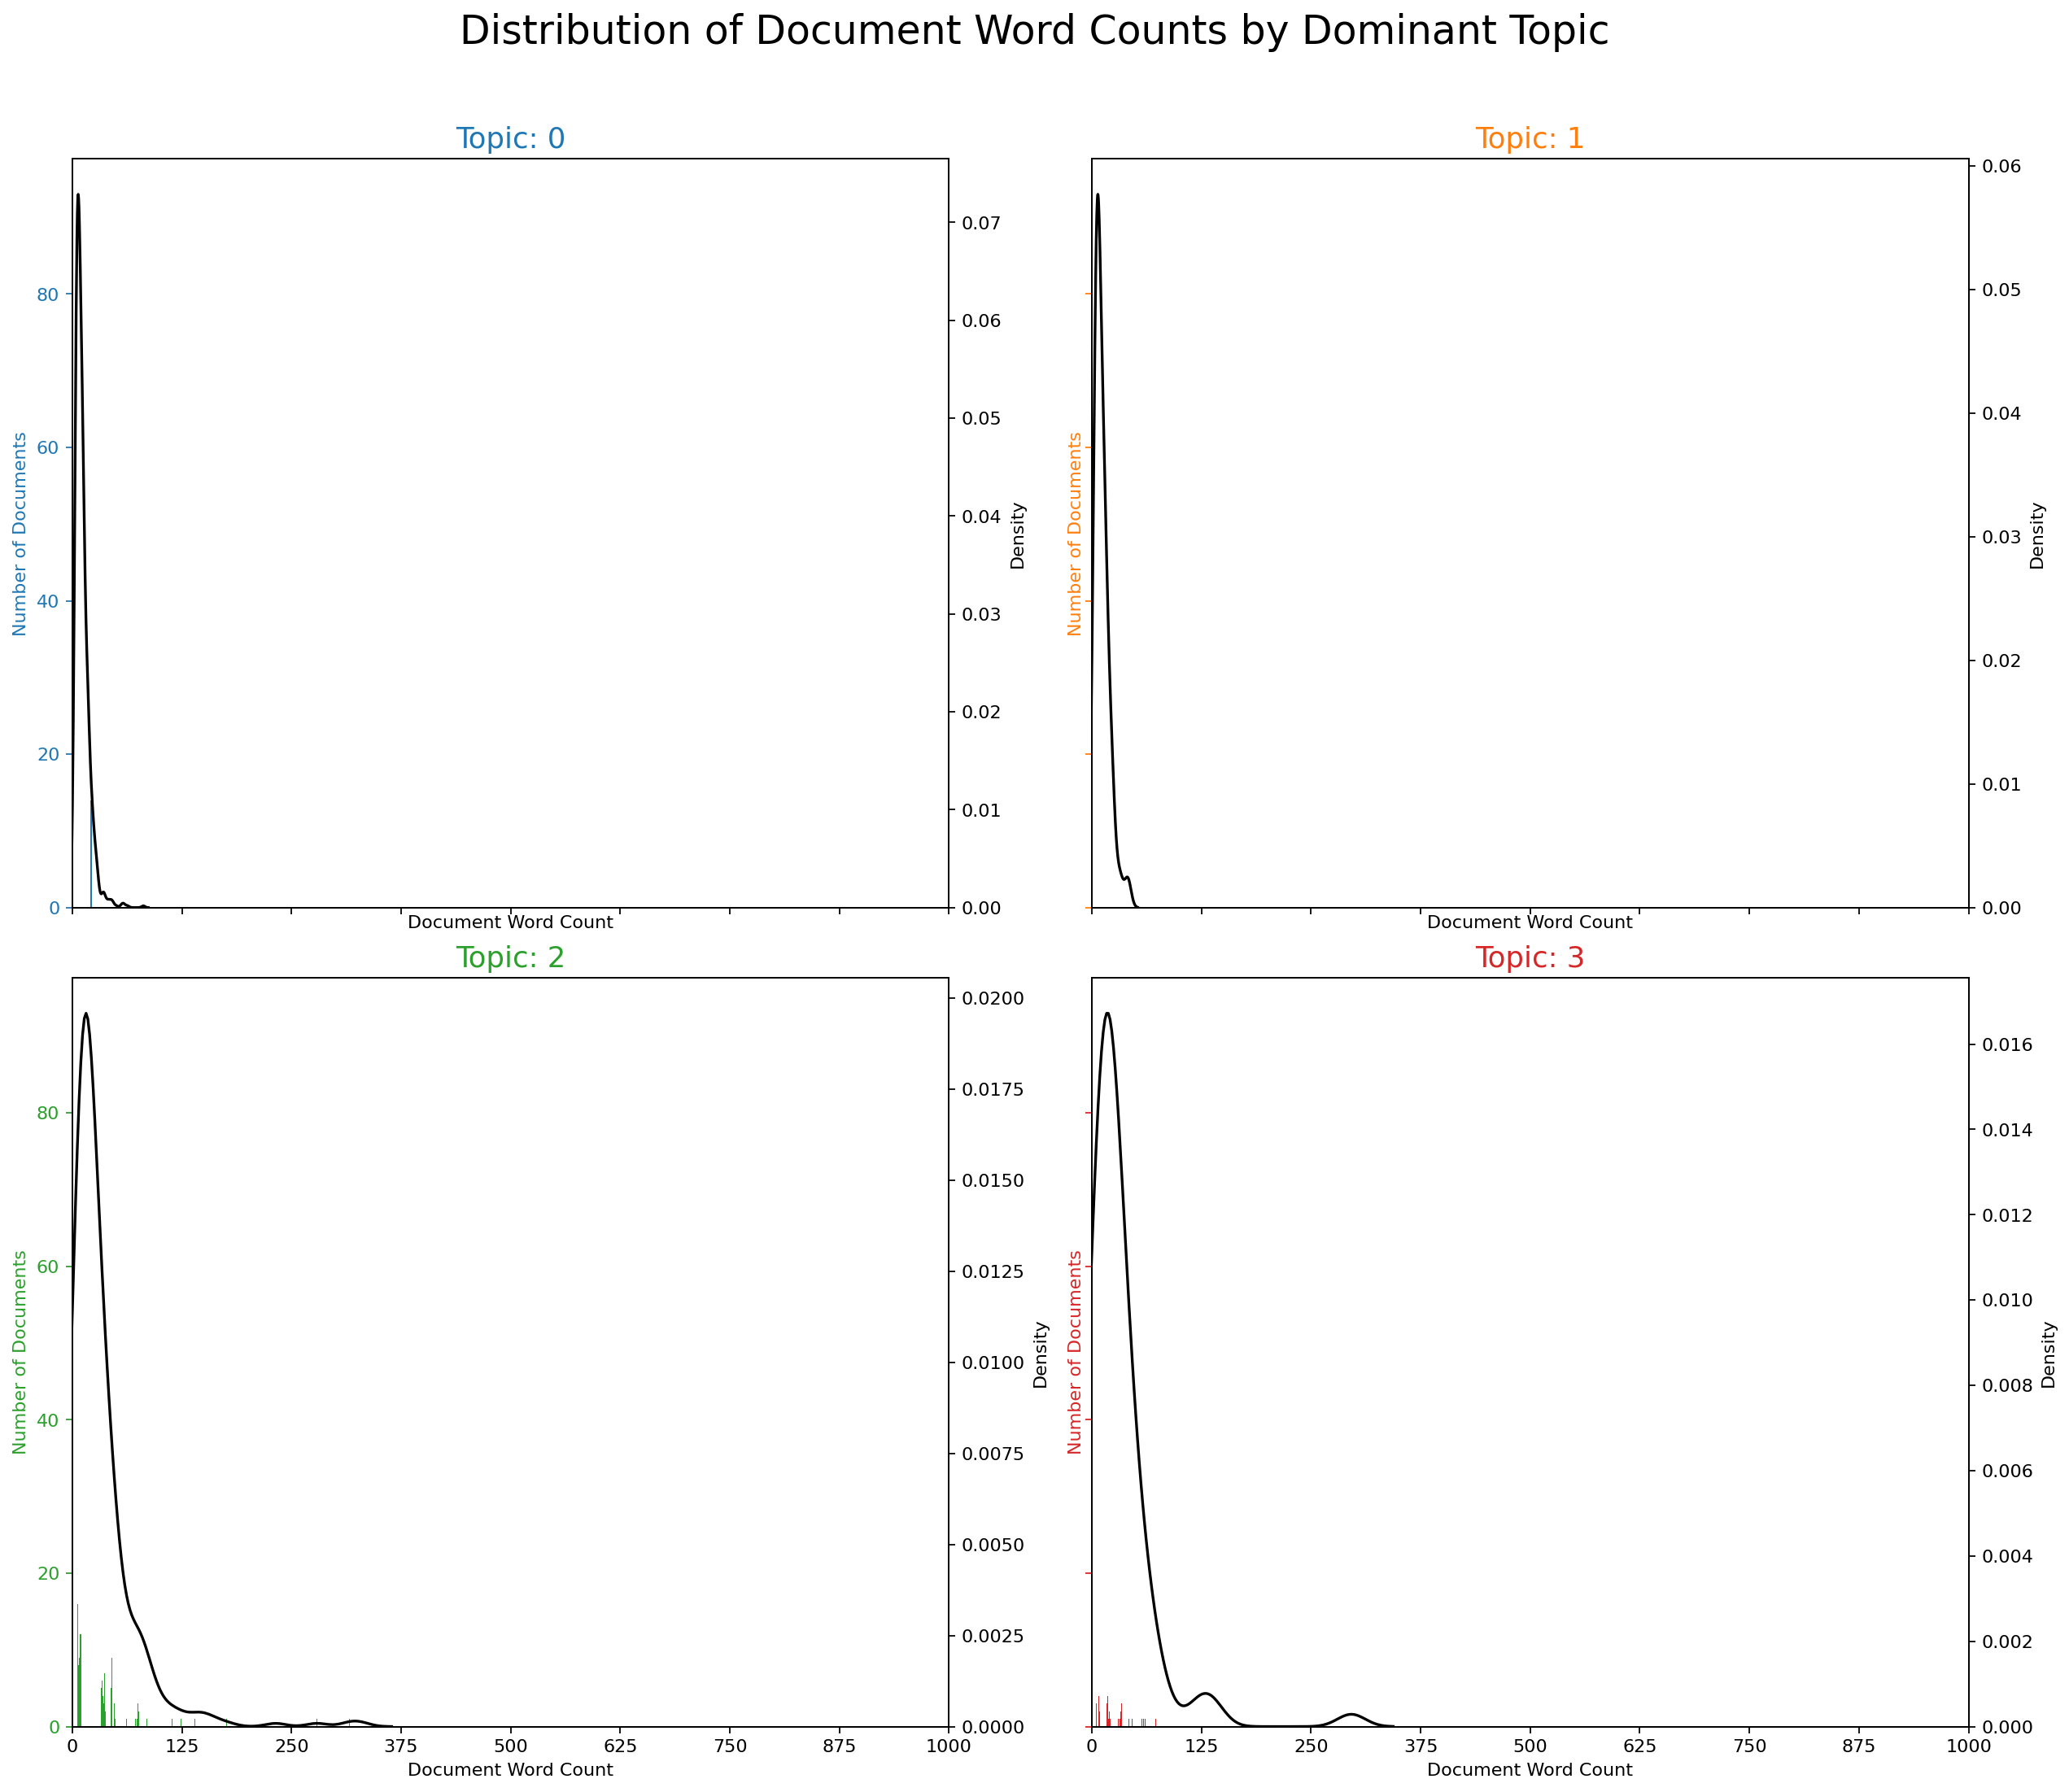

In [46]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    cityfibre_reviews_dominant_topic_sub =  cityfibre_reviews_dominant_topic.loc[ cityfibre_reviews_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in  cityfibre_reviews_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

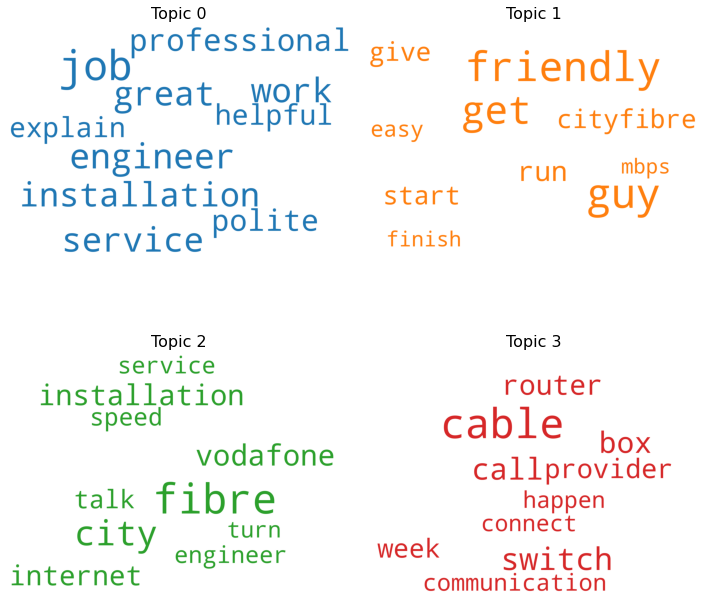

In [47]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

C:\Users\DAYOTO~1\AppData\Local\Temp/ipykernel_21248/2988875143.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, 'word'],


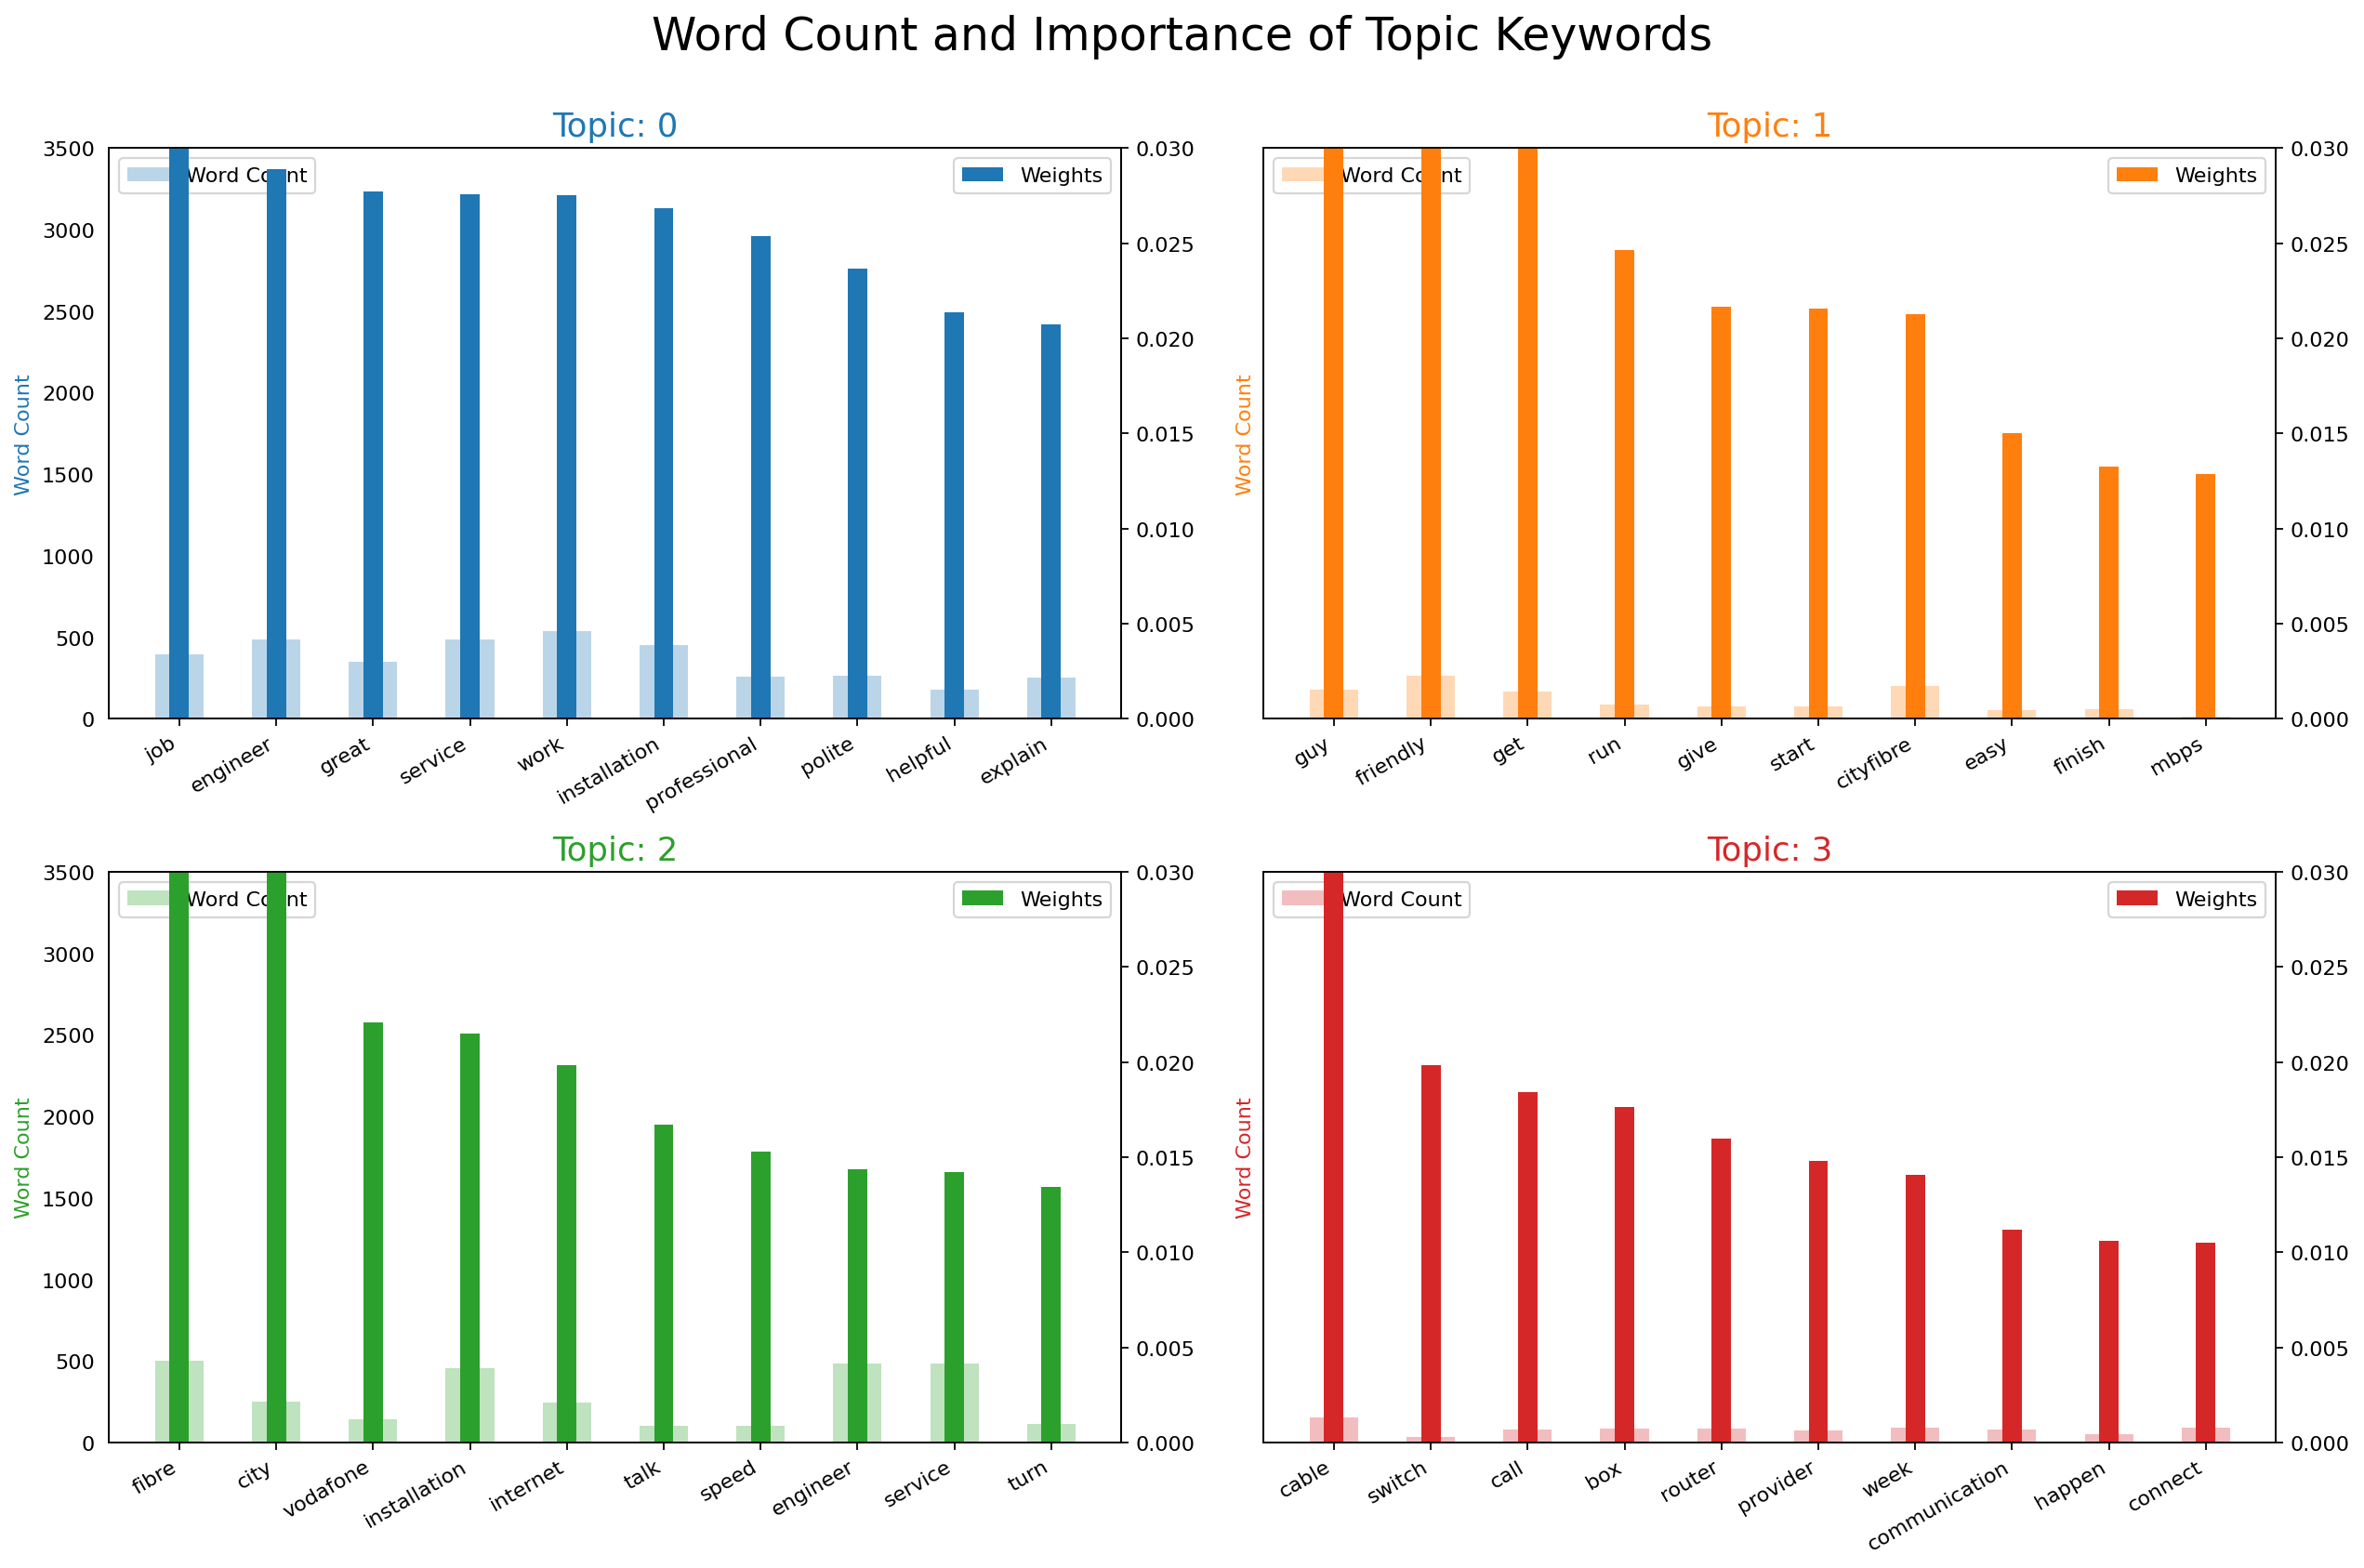

In [48]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

cityfibre_reviews = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", 
           data=cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, :],
           color=cols[i], 
           width=0.5, 
           alpha=0.3, 
           label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", 
                data=cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, :], 
                color=cols[i], 
                width=0.2, 
                label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(cityfibre_reviews.loc[cityfibre_reviews.topic_id==i, 'word'], 
                       rotation=30, 
                       horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# What are the most discussed topics in the documents

In [49]:
#compute the total number of documents attributed to each topic
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
cityfibre_reviews = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = cityfibre_reviews.groupby('Dominant_Topic').size()
cityfibre_reviews_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
cityfibre_reviews_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

cityfibre_reviews_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
cityfibre_reviews_top3words = cityfibre_reviews_top3words_stacked.groupby('topic_id').agg(', \n'.join)
cityfibre_reviews_top3words.reset_index(level=0,inplace=True)

# Create two plots:
#The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

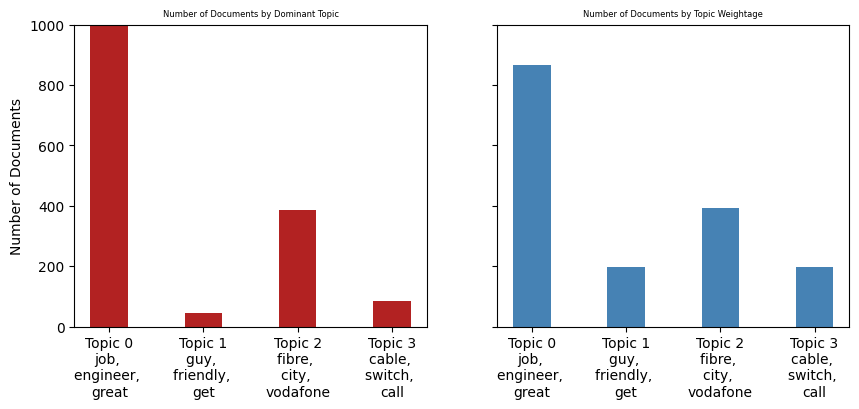

In [50]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', 
        data=cityfibre_reviews_dominant_topic_in_each_doc, 
        width=.4, color='firebrick')
ax1.set_xticks(range(cityfibre_reviews_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + cityfibre_reviews_top3words.loc[cityfibre_reviews_top3words.topic_id==x,
                                                                                                        'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=6))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=cityfibre_reviews_topic_weightage_by_doc, 
        width=.4, color='steelblue')
ax2.set_xticks(range(cityfibre_reviews_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=6))

plt.show()

# Sentence Chart Colored by Topic

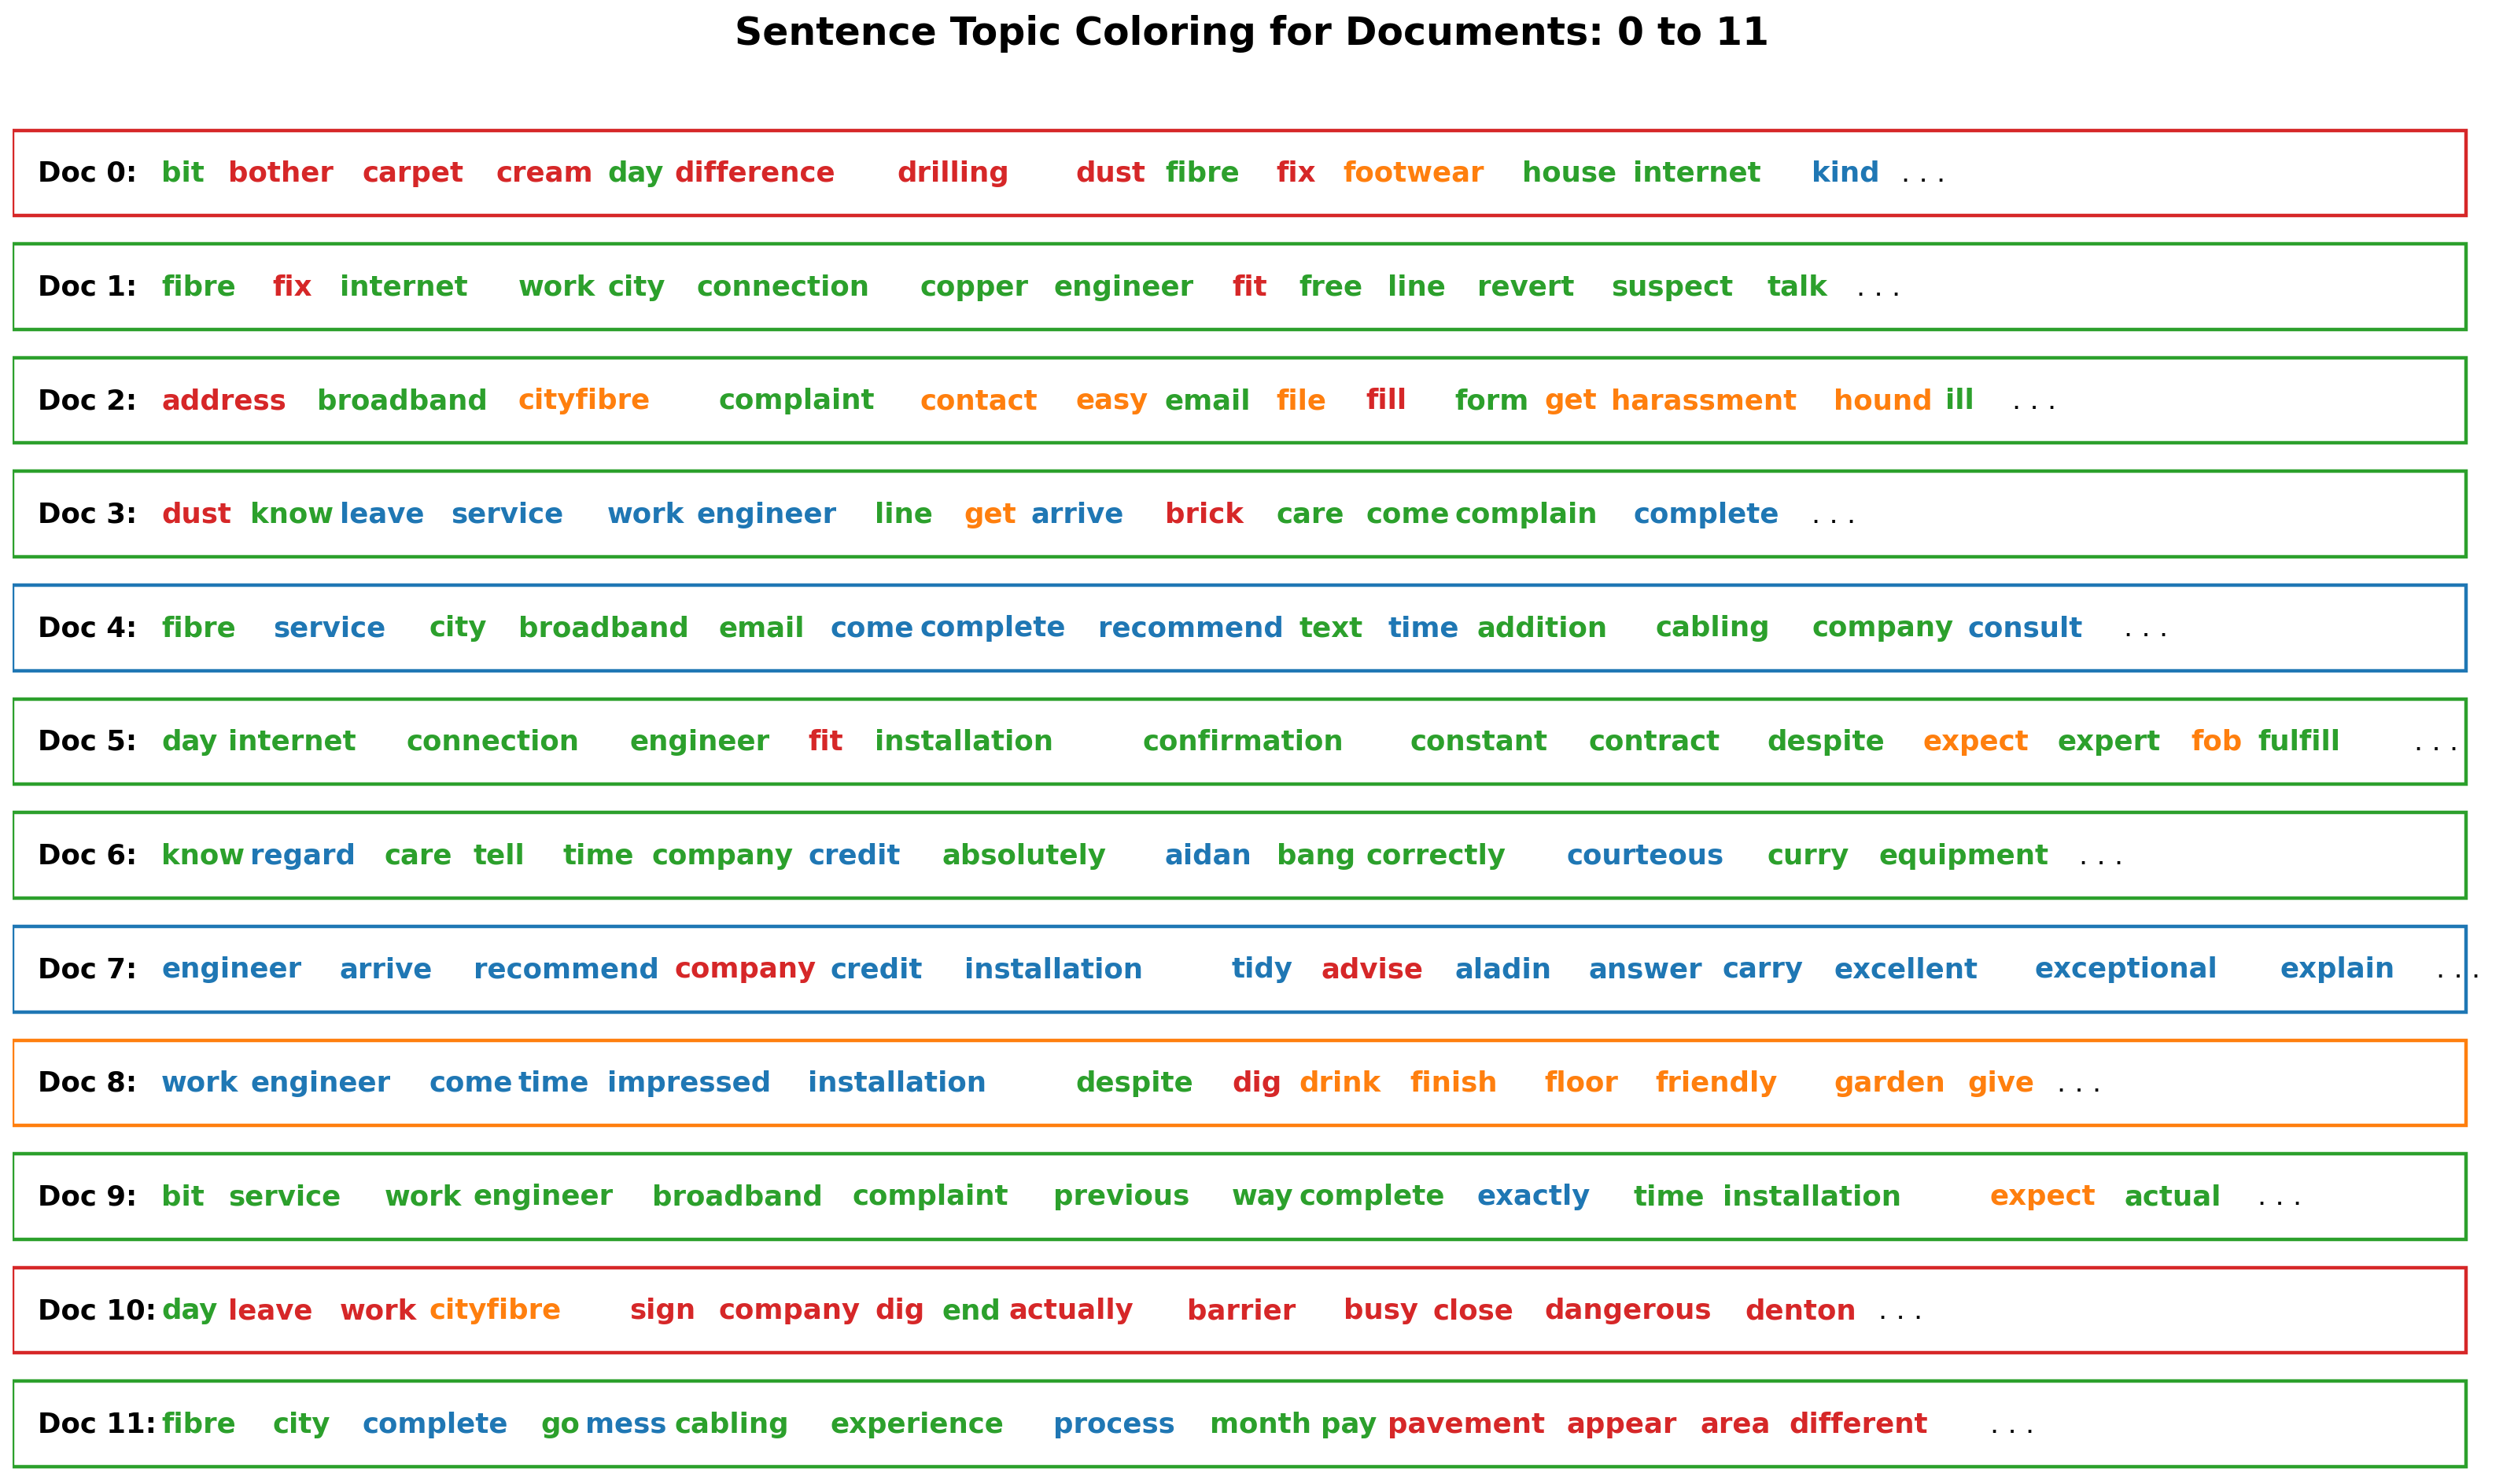

In [51]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), 
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [52]:
cityfibre_reviews

,Document_Id,Dominant_Topic
0,0,3
1,1,2
2,2,2
3,3,2
4,4,0
...,...,...
1650,1650,0
1651,1651,0
1652,1652,3
1653,1653,0
